In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import AutoTokenizer
from transformers import pipeline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/data6000.csv')

data.head(5)

,text,generated
0,Even though lots of students like to work at h...,0
1,Fresh air we're use to being home all day and ...,0
2,Many people believe that self-esteem comes fro...,0
3,"Clearly, everyone should always aim high and a...",0
4,I really think that can be really stressed for...,0


In [ ]:
# Ensure 'text' column is treated as strings, even if it contains NaNs
data['text'] = data['text'].astype(str).fillna("").str.strip()

# Mostrar estadísticas
print("\nEstadísticas del dataset de entrenamiento:")
print(f"Total muestras: {len(data)}")
print(f"Textos AI: {sum(data['generated'] == 1)}")
print(f"Textos humanos: {sum(data['generated'] == 0)}")
# Make sure 'train' is actually 'data'
print(f"Ratio AI/Humano: {sum(data['generated'] == 1)/sum(data['generated'] == 0):.3f}")


Estadísticas del dataset de entrenamiento:
Total muestras: 6000
Textos AI: 3000
Textos humanos: 3000
Ratio AI/Humano: 1.000



Estadísticas de la longitud de texto:
count    6000.000000
mean     1800.132167
std       950.489987
min       239.000000
25%      1154.000000
50%      1550.500000
75%      2200.000000
max      6044.000000
Name: text_length, dtype: float64


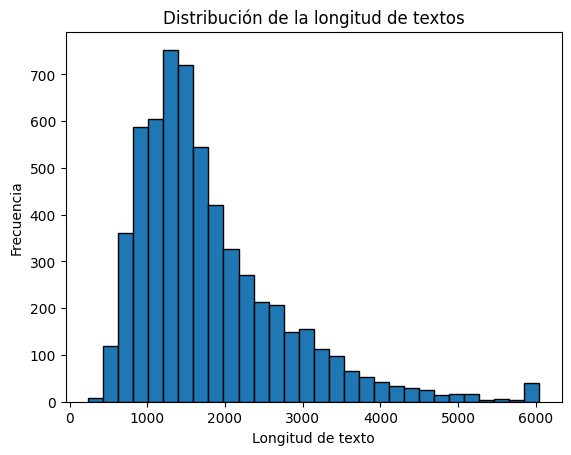

In [ ]:
# Agregar longitud de texto al DataFrame
data['text_length'] = data['text'].apply(len)

# Estadísticas de longitud de texto
print("\nEstadísticas de la longitud de texto:")
print(data['text_length'].describe())

# Visualización de la distribución de longitud
plt.hist(data['text_length'], bins=30, edgecolor='k')
plt.title('Distribución de la longitud de textos')
plt.xlabel('Longitud de texto')
plt.ylabel('Frecuencia')
plt.show()

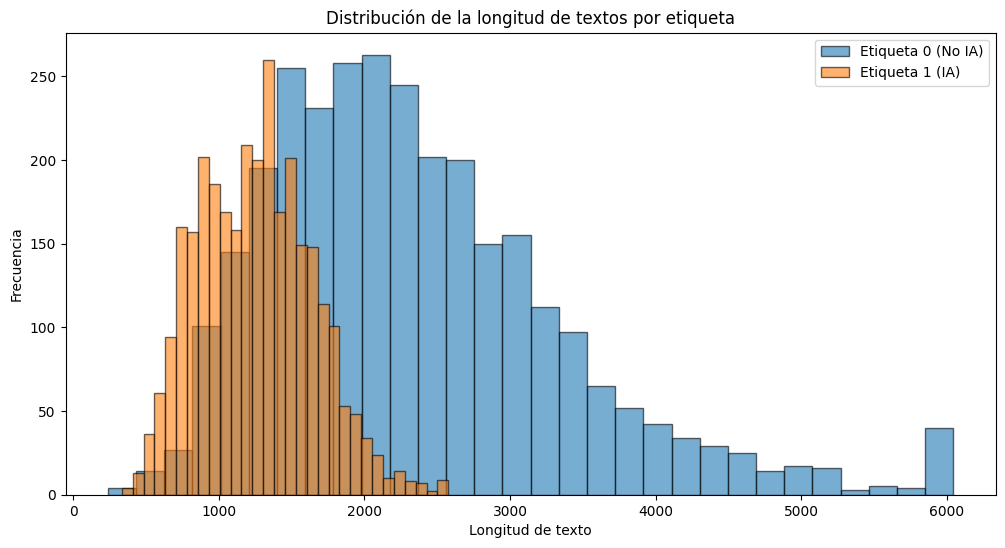

In [ ]:
# Crear un gráfico de histograma para cada etiqueta
plt.figure(figsize=(12, 6))

# Etiqueta 0 (No IA)
plt.hist(data[data['generated'] == 0]['text_length'], bins=30, alpha=0.6, label='Etiqueta 0 (No IA)', edgecolor='k')

# Etiqueta 1 (IA)
plt.hist(data[data['generated'] == 1]['text_length'], bins=30, alpha=0.6, label='Etiqueta 1 (IA)', edgecolor='k')

# Configuración del gráfico
plt.title('Distribución de la longitud de textos por etiqueta')
plt.xlabel('Longitud de texto')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
import re

# Función para pretratamiento con eliminación de signos de puntuación y caracteres especiales
def clean_text_remove_specials(text):
    # Eliminar caracteres que no sean letras o números
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Mantiene solo letras, números y espacios
    text = re.sub(r"\s+", " ", text).strip()  # Elimina espacios adicionales
    return text.lower()

# Función para pretratamiento sin eliminar signos de puntuación
def clean_text_keep_specials(text):
    # Mantener el texto, solo transformaciones mínimas
    text = re.sub(r"\s+", " ", text).strip()  # Elimina espacios adicionales
    return text.lower()

# Crear dos nuevas columnas
data['text_clean_specials_removed'] = data['text'].apply(clean_text_remove_specials)
data['text_clean_keep_specials'] = data['text'].apply(clean_text_keep_specials)

# Verificacion
print(data.head())


                                                text  generated  text_length  \
0  Even though lots of students like to work at h...          0         2006   
1  Fresh air we're use to being home all day and ...          0         4037   
2  Many people believe that self-esteem comes fro...          0         1927   
3  Clearly, everyone should always aim high and a...          0         2069   
4  I really think that can be really stressed for...          0         1023   

                         text_clean_specials_removed  \
0  even though lots of students like to work at h...   
1  fresh air were use to being home all day and g...   
2  many people believe that selfesteem comes from...   
3  clearly everyone should always aim high and ac...   
4  i really think that can be really stressed for...   

                            text_clean_keep_specials  
0  even though lots of students like to work at h...  
1  fresh air we're use to being home all day and ...  
2  many people be

In [ ]:

# Cargar el tokenizer de DeBERTa
model_name = "microsoft/deberta-v3-base"  # Puedes elegir otra variante de DeBERTa
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenizar los textos preprocesados
# Aquí usaremos las dos columnas pretratadas
data['tokens_specials_removed'] = data['text_clean_specials_removed'].apply(
    lambda x: tokenizer.tokenize(x)
)
data['tokens_keep_specials'] = data['text_clean_keep_specials'].apply(
    lambda x: tokenizer.tokenize(x)
)

# Mostrar las primeras filas con los tokens generados
print(data[['text', 'tokens_specials_removed', 'tokens_keep_specials']].head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


                                                text  \
0  Even though lots of students like to work at h...   
1  Fresh air we're use to being home all day and ...   
2  Many people believe that self-esteem comes fro...   
3  Clearly, everyone should always aim high and a...   
4  I really think that can be really stressed for...   

                             tokens_specials_removed  \
0  [▁even, ▁though, ▁lots, ▁of, ▁students, ▁like,...   
1  [▁fresh, ▁air, ▁were, ▁use, ▁to, ▁being, ▁home...   
2  [▁many, ▁people, ▁believe, ▁that, ▁self, estee...   
3  [▁clearly, ▁everyone, ▁should, ▁always, ▁aim, ...   
4  [▁i, ▁really, ▁think, ▁that, ▁can, ▁be, ▁reall...   

                                tokens_keep_specials  
0  [▁even, ▁though, ▁lots, ▁of, ▁students, ▁like,...  
1  [▁fresh, ▁air, ▁we, ', re, ▁use, ▁to, ▁being, ...  
2  [▁many, ▁people, ▁believe, ▁that, ▁self, -, es...  
3  [▁clearly, ,, ▁everyone, ▁should, ▁always, ▁ai...  
4  [▁i, ▁really, ▁think, ▁that, ▁can, ▁be, ▁reall..

In [ ]:
# Función para comparar un ejemplo
def compare_example(data, index):
    """
    Compara el texto original y sus versiones tokenizadas.
    Args:
        data (DataFrame): El dataset que contiene el texto original y las columnas tokenizadas.
        index (int): Índice del ejemplo a comparar.
    """
    original_text = data.loc[index, 'text']
    tokens_specials_removed = data.loc[index, 'tokens_specials_removed']
    tokens_keep_specials = data.loc[index, 'tokens_keep_specials']

    # Mostrar la comparación
    print(f"{'='*50}\nOriginal Text:\n{original_text}\n")
    print(f"{'='*50}\nTokens (Specials Removed):\n{tokens_specials_removed}\n")
    print(f"{'='*50}\nTokens (Specials Kept):\n{tokens_keep_specials}\n")

# Llamar a la función para un índice específico (ejemplo 0)
compare_example(data, index=0)


Original Text:
Even though lots of students like to work at home, I strongly believe its better to work at schools.

Students should have friends in there lives to be more social in the world. One day I saw a student frustrated with work so I decided to help him in America Civil War. In my science class we have projects to do we get in a group of friends to get a good grade and we see a student work by him self. This shows that in schools we should be with other students to bring in ideas, ways that others can't see.

In school you can be well taught and understand better when people like teachers, or other students help them. Those were the things we both like too he was my first friend in that school. I am writing about should students work in schools or their homes. Then one of the kids came up to me and ask what do you like I told him what I love like animals, sports. For example, In history there are students that don't understand they would just sit in their seats and not ask for

Resumen Numérico del Volumen de Tokens:
  generated num_tokens_specials_removed                    \
                                   mean median        std   
0         0                  447.061667  413.0  196.03433   
1         1                  204.539000  204.0   63.87142   

  num_tokens_keep_specials                     
                      mean median         std  
0               490.940333  455.0  213.735568  
1               229.381333  228.0   71.781791  


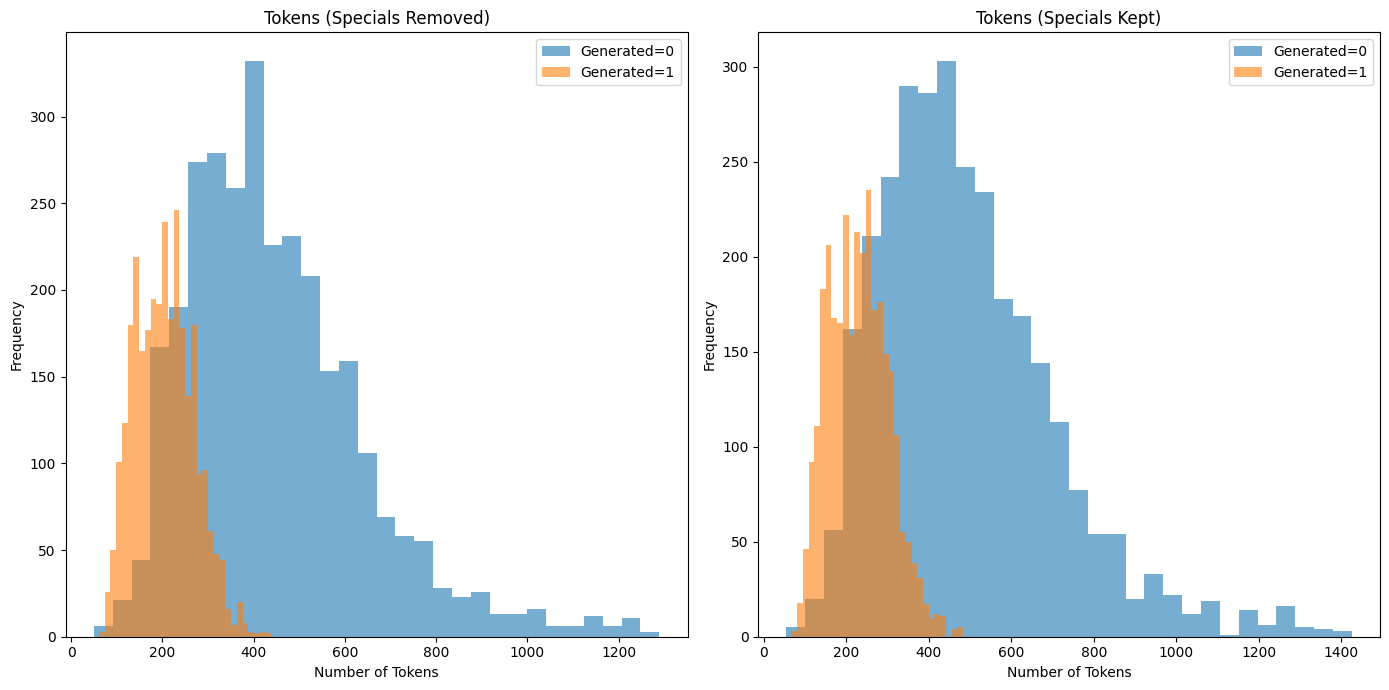

In [ ]:
# Crear columnas con el conteo de tokens
data['num_tokens_specials_removed'] = data['tokens_specials_removed'].apply(len)
data['num_tokens_keep_specials'] = data['tokens_keep_specials'].apply(len)

# Resumen numérico del volumen de tokens
summary = data.groupby('generated').agg({
    'num_tokens_specials_removed': ['mean', 'median', 'std'],
    'num_tokens_keep_specials': ['mean', 'median', 'std']
}).reset_index()

# Mostrar resumen numérico
print("Resumen Numérico del Volumen de Tokens:")
print(summary)

# Graficar la distribución del número de tokens
plt.figure(figsize=(14, 7))

# Subplot 1: Distribución de tokens con especiales removidos
plt.subplot(1, 2, 1)
for gen_type in data['generated'].unique():
    subset = data[data['generated'] == gen_type]
    plt.hist(subset['num_tokens_specials_removed'], bins=30, alpha=0.6, label=f'Generated={gen_type}')
plt.title('Tokens (Specials Removed)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()

# Subplot 2: Distribución de tokens con especiales mantenidos
plt.subplot(1, 2, 2)
for gen_type in data['generated'].unique():
    subset = data[data['generated'] == gen_type]
    plt.hist(subset['num_tokens_keep_specials'], bins=30, alpha=0.6, label=f'Generated={gen_type}')
plt.title('Tokens (Specials Kept)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
data.columns

Index(['text', 'generated', 'text_length', 'text_clean_specials_removed',
       'text_clean_keep_specials', 'tokens_specials_removed',
       'tokens_keep_specials', 'num_tokens_specials_removed',
       'num_tokens_keep_specials'],
      dtype='object')

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader, TensorDataset

# Configuración
MODEL_NAME = "microsoft/deberta-v3-base"  # Modelo DeBERTa
BATCH_SIZE = 32  # Tamaño del batch
MAX_LENGTH = 512  # Longitud máxima de tokens

# Cargar tokenizer y modelo
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)

# Mover modelo a GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Tokenizar textos para ambas versiones
def tokenize_column(data, column_name, max_length):
    """
    Tokeniza los textos en una columna específica del dataset.
    Args:
        data (DataFrame): Dataset que contiene los textos.
        column_name (str): Nombre de la columna con los textos.
        max_length (int): Longitud máxima de los tokens.
    Returns:
        dict: Tensores tokenizados.
    """
    return tokenizer(
        data[column_name].tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

tokens_specials_removed = tokenize_column(data, 'text_clean_specials_removed', MAX_LENGTH)
tokens_keep_specials = tokenize_column(data, 'text_clean_keep_specials', MAX_LENGTH)

# Crear DataLoader para batches
def create_dataloader(tokens, batch_size):
    """
    Crea un DataLoader para manejar el procesamiento en batches.
    Args:
        tokens (dict): Tensores tokenizados (`input_ids`, `attention_mask`).
        batch_size (int): Tamaño del batch.
    Returns:
        DataLoader: DataLoader para iterar en batches.
    """
    dataset = TensorDataset(tokens['input_ids'], tokens['attention_mask'])
    return DataLoader(dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

dataloader_specials_removed = create_dataloader(tokens_specials_removed, BATCH_SIZE)
dataloader_keep_specials = create_dataloader(tokens_keep_specials, BATCH_SIZE)

# Generar embeddings
def generate_embeddings(dataloader, model, device):
    """
    Genera embeddings para los textos en batches.
    Args:
        dataloader (DataLoader): DataLoader con los tensores tokenizados.
        model (AutoModel): Modelo DeBERTa.
        device (torch.device): Dispositivo para realizar el cálculo.
    Returns:
        torch.Tensor: Embeddings generados (num_textos, hidden_size).
    """
    embeddings = []
    model.eval()  # Configurar el modelo en modo evaluación

    with torch.no_grad():
        for batch in dataloader:
            # Transferir batch a GPU
            input_ids, attention_mask = [t.to(device, non_blocking=True) for t in batch]

            # Procesar batch en el modelo
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)

            # Usar el embedding del token [CLS]
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # (batch_size, hidden_size)
            embeddings.append(cls_embeddings)

            # Liberar memoria de GPU después de cada lote
            del input_ids, attention_mask, outputs
            torch.cuda.empty_cache()

    return torch.cat(embeddings, dim=0)  # Combinar todos los batches

# Generar embeddings para ambas columnas
embeddings_specials_removed = generate_embeddings(dataloader_specials_removed, model, device)
embeddings_keep_specials = generate_embeddings(dataloader_keep_specials, model, device)

# Guardar embeddings
torch.save(embeddings_specials_removed, "/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_specials_removed.pt")
torch.save(embeddings_keep_specials, "/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/embeddings_keep_specials.pt")

print(f"Embeddings generados (Specials Removed): {embeddings_specials_removed.shape}")
print(f"Embeddings generados (Keep Specials): {embeddings_keep_specials.shape}")


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

Embeddings generados (Specials Removed): torch.Size([6000, 768])
Embeddings generados (Keep Specials): torch.Size([6000, 768])


In [ ]:
# Guardar el dataset actual como CSV
dataset_path = "/content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/processed_data.csv"  # Nombre del archivo para el dataset

data.to_csv(dataset_path, index=False)

print(f"Dataset guardado exitosamente como {dataset_path}. ¡Listo para continuar en otro cuaderno!")


Dataset guardado exitosamente como /content/drive/MyDrive/TFM_Kschool/DataSets/Dmitiva/data6k/DeBerta_train/processed_data.csv. ¡Listo para continuar en otro cuaderno!
